<img src="https://github.com/aminizahra/ML_AI2YOU/blob/main/AI2YOU.png?raw=true" alt="AI2YOU" width="300" height="300">
<h1 align="center"><font size = 14>Hands-On Machine Learning</font></h1>
<br>
<h2 align="center"><font size = 5>K-means Clustering</font></h2>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# Part 01: Scratch

# 0. Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
np.random.seed(123)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

import seaborn as sns

# 1. Read Data

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.head()

,x,y
0,-0.542,23.761
1,8.129,25.661
2,4.239,25.298
3,-0.691,25.230
4,3.539,21.645


In [4]:
data.shape

(60, 2)

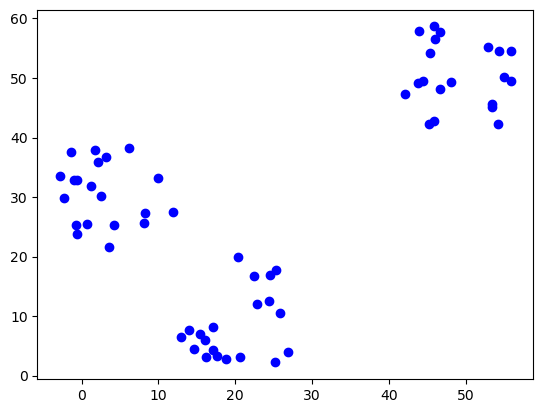

In [5]:
plt.scatter(data['x'], data['y'], c='b')
plt.show()

# 2. initialization centroids

In [8]:
def initial_cent(k, data):
    
    n = data.shape[1]
    
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    
    centroids = []
    
    for cent in range(k):
        cent = np.random.uniform(centroid_min, centroid_max, n)
        centroids.append(cent)
    
    centroids = pd.DataFrame(centroids, columns=data.columns)
    
    return centroids

In [9]:
centroids = initial_cent(3, data)
centroids

,x,y
0,39.996300,14.777837
1,11.134063,31.075254
2,41.409843,23.195700


# 3. Calculate the sum of squared errors

In [10]:
def cal_error(a, b):
    error = np.square(np.sum((a-b)**2))
    
    return error

In [12]:
errors = np.array([])

for cent in range(centroids.shape[0]):
    error = cal_error(centroids.iloc[cent, :], data.iloc[0, :])
    
    errors = np.append(errors, error)

In [13]:
errors

array([2972351.68265223,   36034.96413044, 3098574.16619018])

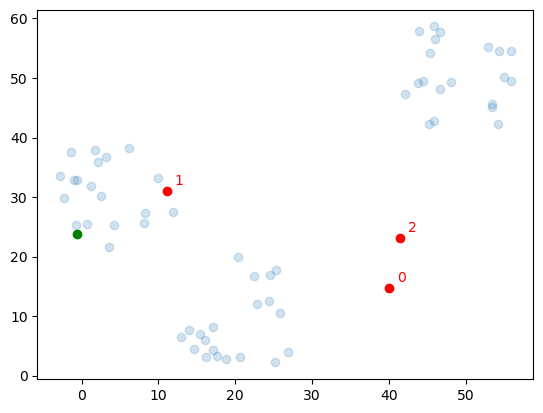

In [14]:
plt.scatter(data.iloc[1:,0], data.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(data.iloc[0,0], data.iloc[0,1],  marker = 'o', c = 'g')



for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

# 4. Assign a centroid to each of the observations

In [15]:
def assign_cent(data, centroids):
    
    m = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]
    
    for x in range(m):
        errors = np.array([])
        
        for cent in range(k):
            error = cal_error(centroids.iloc[cent, :2], data.iloc[x, :2])
            errors = np.append(errors, error)
        
        closet_cent = np.where(errors == np.min(errors))[0].tolist()[0]
        centroid_error = np.min(errors)
        
        centroid_assign.append(closet_cent)
        centroid_errors.append(centroid_error)
        
    return(centroid_assign, centroid_errors)

In [16]:
data['centroid'], data['error'] = assign_cent(data.iloc[:, :2], centroids)

data[['centroid', 'error']].head()

,centroid,error
0,1,36034.964130
1,1,1470.305065
2,1,6547.814773
3,1,30275.695617
4,1,21495.866518


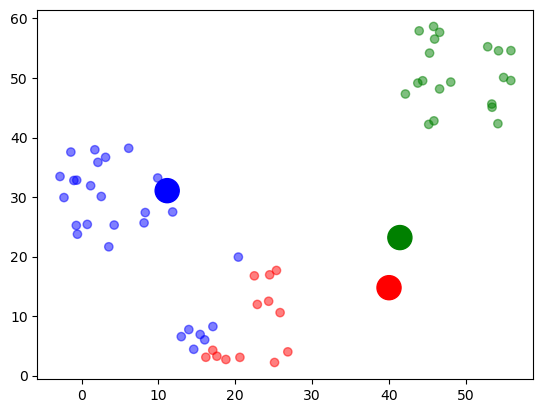

In [17]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)

plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

# 5. Calculate the sum of total errors

In [18]:
data['error'].sum()

21382270.708532356

# 6. Recalculate the position of the centroids

In [19]:
data_columns = ['x', 'y']

centroids = data.groupby('centroid').mean().loc[:, data_columns].reset_index(drop=True)

centroids

,x,y
0,22.112000,8.391077
1,6.094926,24.894370
2,48.898800,50.526050


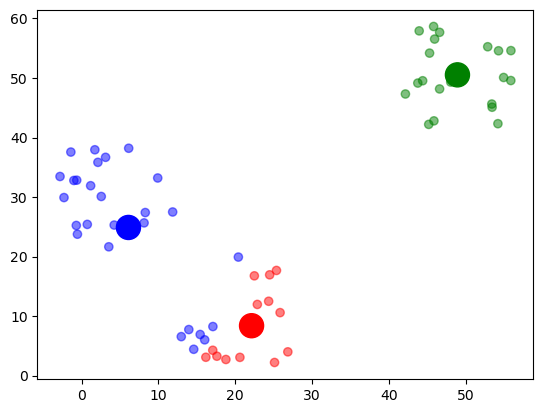

In [20]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

# 7. K-Means

In [21]:
def kmeans(data, k):
    centroids = initial_cent(k, data)
    error = []
    compr = True
    i = 0
    
    while(compr):
        data['centroid'], iter_error = assign_cent(data, centroids)
        error.append(sum(iter_error))
        
        centroids = data.groupby('centroid').agg('mean').reset_index(drop=True)
        
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i], 3) != round(error[i-1], 3)):
                compr = True
            else:
                compr = False
        i = i+1
        
        data['centroid'], iter_error = assign_cent(data, centroids)
        iter_error = sum(iter_error)
        
        centroids = data.groupby('centroid').mean().reset_index(drop=True)
        return (data['centroid'], iter_error, centroids)

In [22]:
data['centroid'], _, centroids= kmeans(data.drop(['centroid', 'error'], axis=1), 3)

In [24]:
# data['centroid']

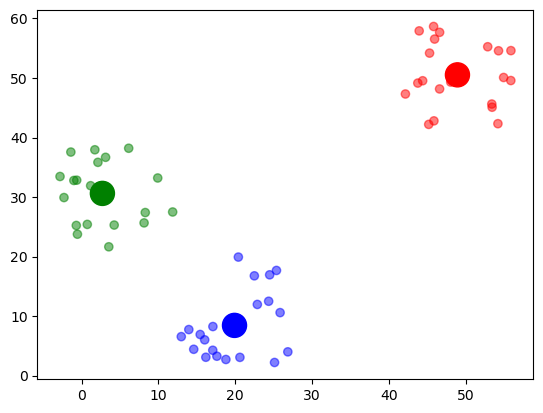

In [25]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

# 8. elbow

In [28]:
total_errors = []
n = 10

for i in range(n):
    _, it_error, _=kmeans(data.drop(['centroid', 'error'], axis=1), i+1)
    total_errors.append(it_error)

In [29]:
# list(range(10))

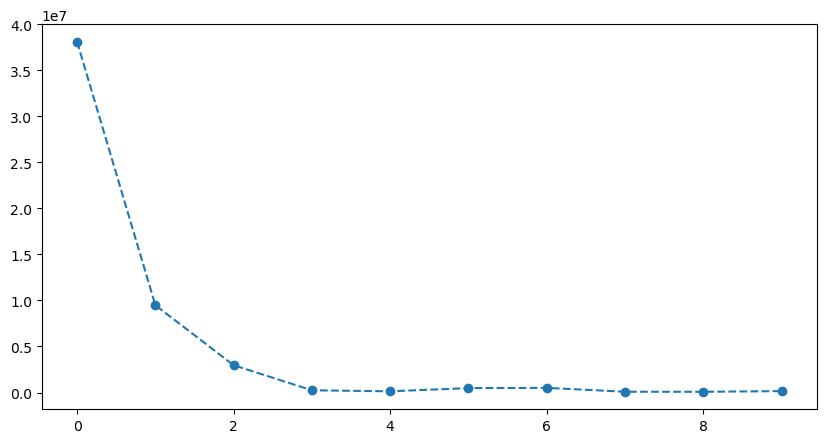

In [30]:
plt.figure(figsize=(10,5))
plt.plot(total_errors, 'o--')#total_errors)
plt.show()

# Part 02: K-Means ---> sklearn.cluster.KMeans

In [31]:
X = pd.read_csv('Data.csv')

In [32]:
model = KMeans(n_clusters=2)

In [33]:
cluster_lab = model.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
X['cluster_lab'] = cluster_lab

In [35]:
X.head()

,x,y,cluster_lab
0,-0.542,23.761,0
1,8.129,25.661,0
2,4.239,25.298,0
3,-0.691,25.230,0
4,3.539,21.645,0


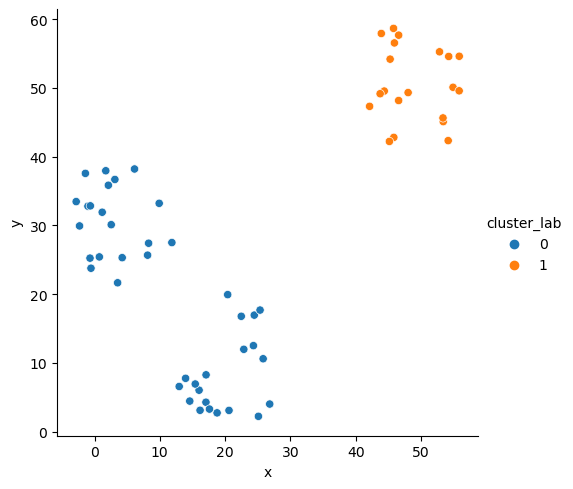

In [36]:
sns.relplot(x="x", y="y", hue="cluster_lab", data=X)

In [37]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    
    model.fit(X.drop('cluster_lab', axis=1))
    
    ssd.append(model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Sum of Squared Distances')

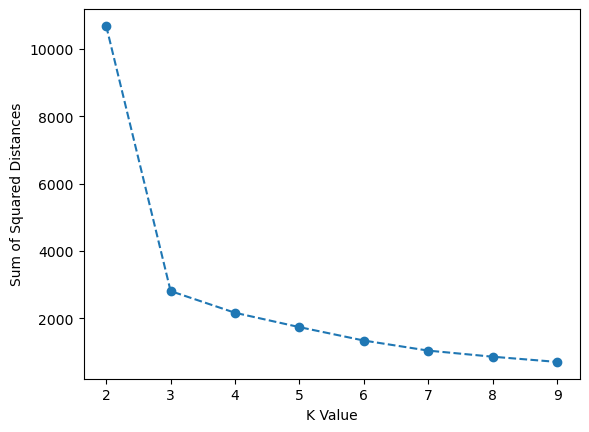

In [38]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')